# Example script to generate the Bowl_shaped SVG file

Total amount of rays =  54
calculated Arena intersectionpoints 49


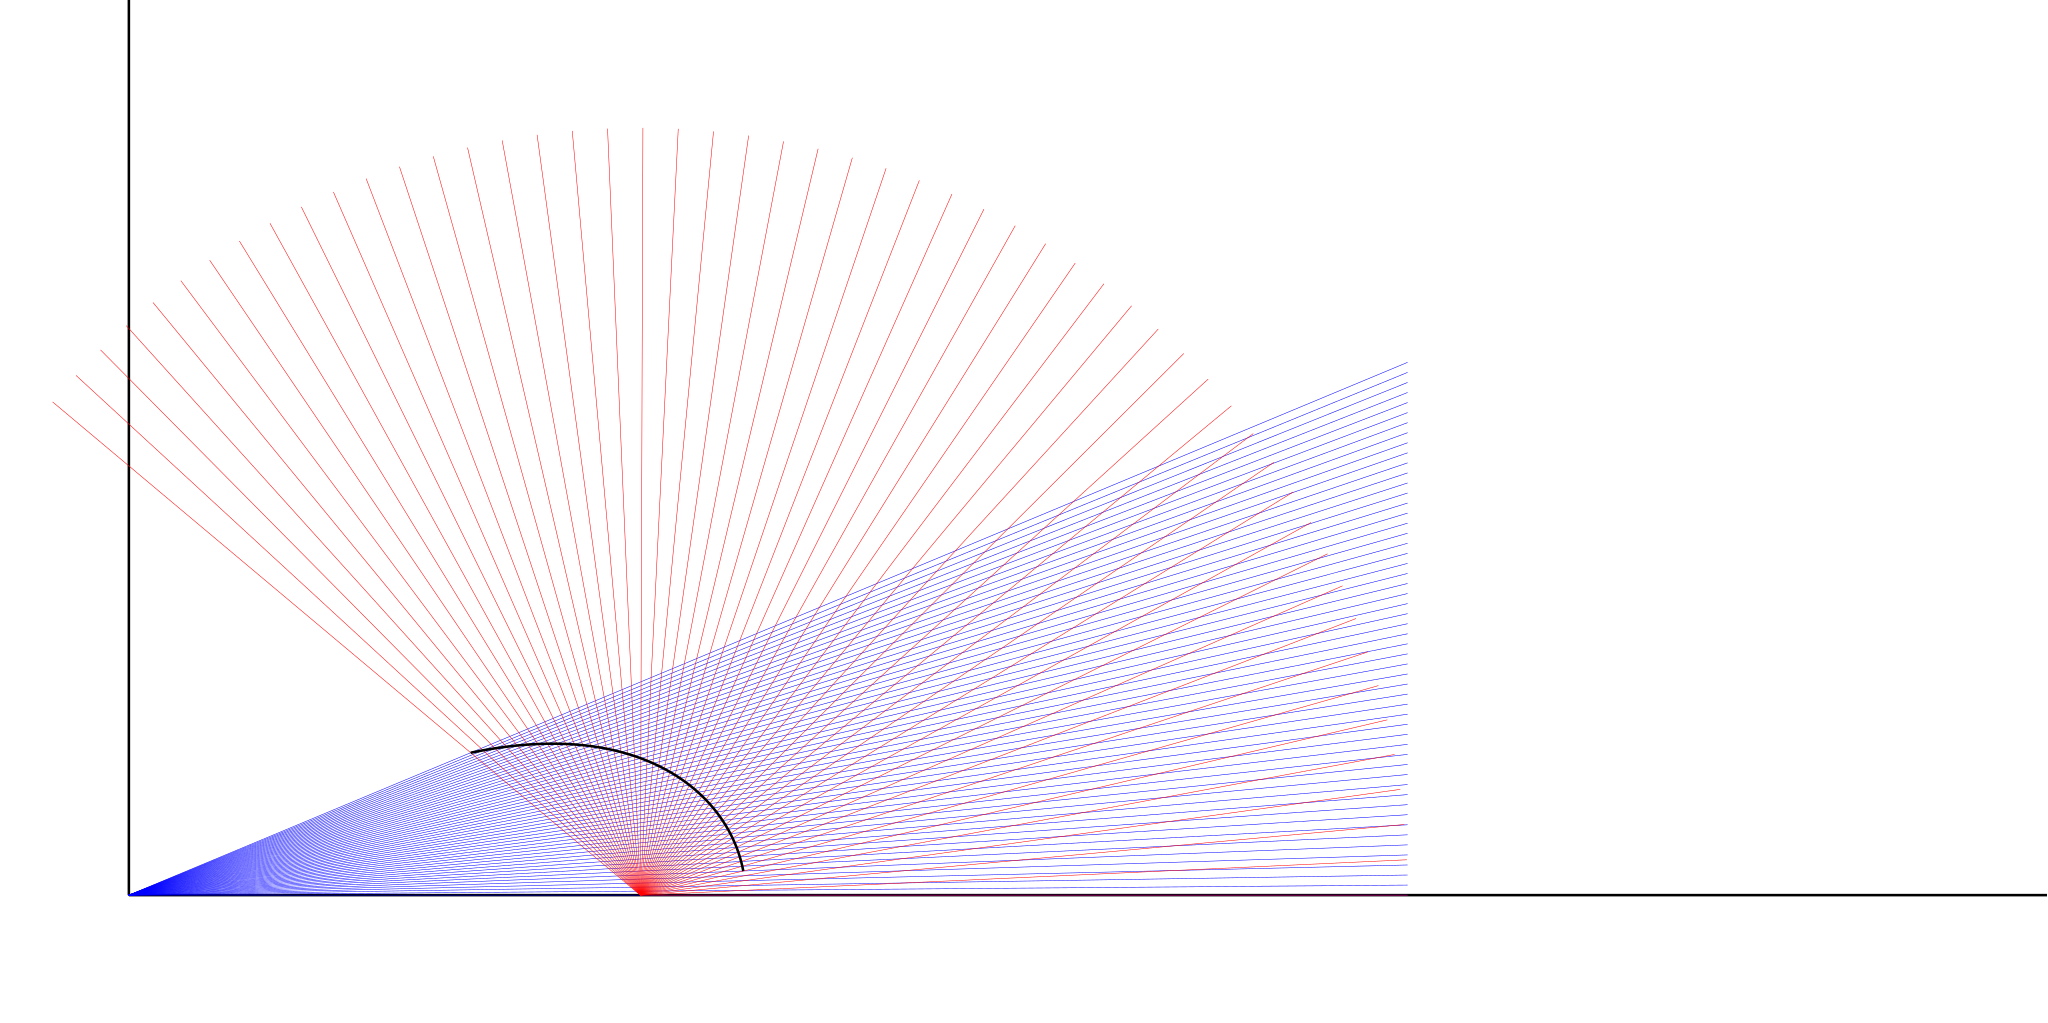

In [3]:
import cairo
from sympy import Point, Segment
import sympy as sym
import numpy as np
from IPython.display import SVG


def draw_line (point1,point2,width=2):
    context.set_line_width(width)
    context.move_to(point1[0],point1[1])
    context.line_to(point2[0],point2[1])
    context.stroke()
    
def draw_line_s (point_1,point_2,width=3):
    
    point1 = point_1.coordinates
    point2 = point_2.coordinates
    context.set_line_width(width)
    context.move_to(point1[0],point1[1])
    context.line_to(point2[0],point2[1])
    context.stroke()
    
def draw_segment (segment,width=1,rgba = (0,0,0,1)):
    context.set_source_rgba(rgba[0],rgba[1],rgba[2],rgba[3])
    context.set_line_width(width)
    point1 = segment.points[0].coordinates
    point2 = segment.points[1].coordinates
    context.move_to(point1[0],point1[1])
    context.line_to(point2[0],point2[1])
    context.stroke()
    
def draw_path(List,width =1,rgba = (0,0,0,1)):
    context.set_source_rgba(rgba[0],rgba[1],rgba[2],rgba[3])
    context.set_line_width(width)
    for index, obj in enumerate(List[:], start=0):
        
        if isinstance(List[index], Point):
            if index ==0:
                context.move_to((List[index])[0],(List[index])[1])
            else:
                context.line_to((List[index])[0],(List[index])[1])

    context.stroke()
    
def line_intersection(segment1, segment2):

    A = segment1.points[0].coordinates
    B = segment1.points[1].coordinates
    C = segment2.points[0].coordinates
    D = segment2.points[1].coordinates
  
    xdiff = (A[0] - B[0], C[0] - D[0])
    ydiff = (A[1] - B[1], C[1] - D[1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(A,B), det(C,D))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return Point(x, y)

filename = "example_shape.svg"


with cairo.SVGSurface(filename, 800/0.352778, 400/0.352778) as surface:
    context = cairo.Context(surface)
    context.translate(50/0.352778,350/0.352778)
    context.scale(1/0.352778, -1/0.352778)
    
      
    o = (0,0) # origin
    y = (0,350) # size in y
    x = (750,0) # size in x
    draw_line(o,x,1) # draw coordsystem
    draw_line(o,y,1) # draw coordsystem

    # script calculates projection rays for a projector with positiv offset of 100%.
    # Most business projectors have a positive offset, allowing you to position them on a table
    # and have them project upwards. For example, a projector with a 100 percent vertical offset 
    # would project an image whose bottom edge is in line with the center of the lens and that extends upwards.
    
    Beamers_position = Point(0,0) 
    Beamers_throw_ratio = 1.2 #, 1.505    # change here the projection properties
    Beamers_resolution_width = 1080
    Distance_beamer_fly = 200   # distanz between fly and projector
    Arena_start_angle = 15      # Startangle to calculate arena rays >0° 
    Arena_stop_angle = 140      # Stopangle <180°
    Arena_max_radius = 300      # maximal allowed radius size of the arena
    Pixel_per_degree = 10       # amount of rays per arena 
    Flys_position = Point(Distance_beamer_fly,0)

    List_Beamer_rays = []
    List_Fly_rays = []
    n = int(Beamers_resolution_width/2/Pixel_per_degree) 
    print ("Total amount of rays = ",n)
    

    #draw beamer
    Beamer_projection_height = (Distance_beamer_fly+Arena_max_radius)/Beamers_throw_ratio/2
    Beamer_endpos_rays = np.linspace(0,Beamer_projection_height,n)
    for point in Beamer_endpos_rays:
        List_Beamer_rays.append(Segment(Beamers_position,Point(Distance_beamer_fly+Arena_max_radius,point)))
    
    for obj in List_Beamer_rays:
        draw_segment(obj,0.2,(0,0,255,1))
    
    # draw fly
    r = Arena_max_radius
    x = Distance_beamer_fly
    y = 0
    Start_index = int(n/Arena_stop_angle*Arena_start_angle)
    Stop_index = int(n/Arena_stop_angle*Arena_stop_angle)

    angles = np.linspace(0,Arena_stop_angle,n)
    for angle in angles:
        Fly_endpos_rays = Point(x+r*sym.cos(angle*sym.pi/180),y+r*sym.sin(angle*sym.pi/180))
        List_Fly_rays.append(Segment(Flys_position,Fly_endpos_rays))
    
    for obj in List_Fly_rays:
        draw_segment(obj,0.2,(255,0,0,1))

    intersectionpoints =[] # calculate intersectionpoints
    
    for index, obj in enumerate(List_Beamer_rays[Start_index:Stop_index], start=Start_index):
        intersectionpoints.append(line_intersection(List_Beamer_rays[index],List_Fly_rays[index]))
        
    print("calculated Arena intersectionpoints",Stop_index-Start_index)                           
    draw_path(intersectionpoints)
    
     
SVG(filename=filename)